In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import librosa
audio_path = '../Cogonon/mexmex.wav'
x , sr = librosa.load(audio_path)

# Playing Audio
Using IPython.display.Audio, to play the audio

In [3]:
import IPython.display as ipd
ipd.Audio(audio_path)

You can even use an mp3 or a WMA format for the audio example.

# Visualizing Audio

**Waveform**

We can plot the audio array using librosa.display.waveplot:

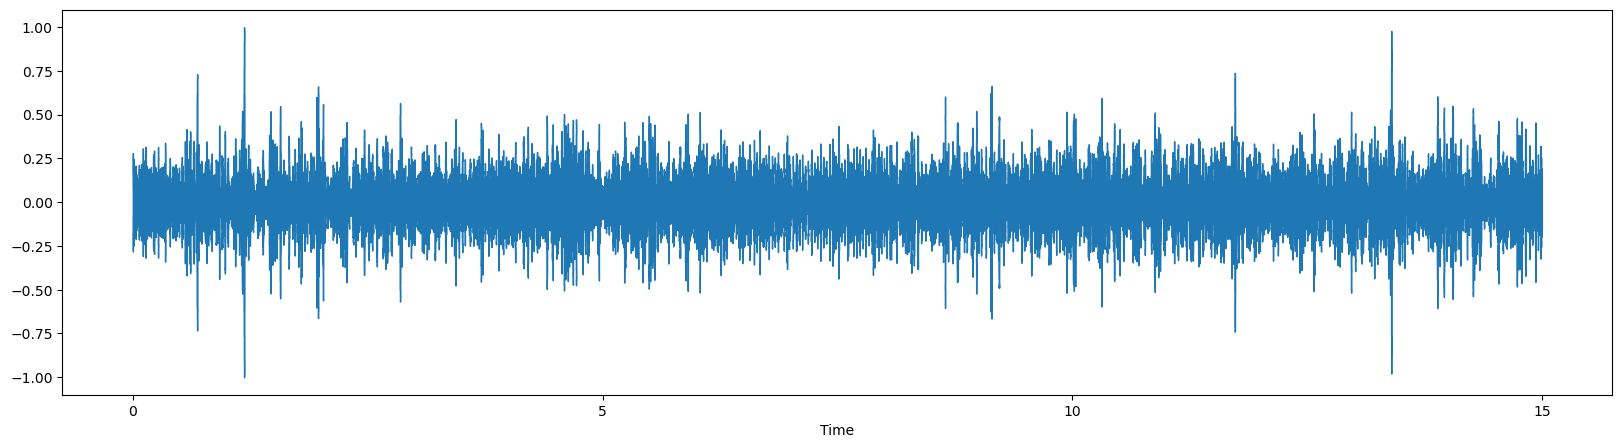

In [72]:
%matplotlib inline
import sklearn.preprocessing
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

Here, we have the plot the amplitude envelope of a waveform.

**Spectrogram**

We can also display a spectrogram using librosa.display.specshow.

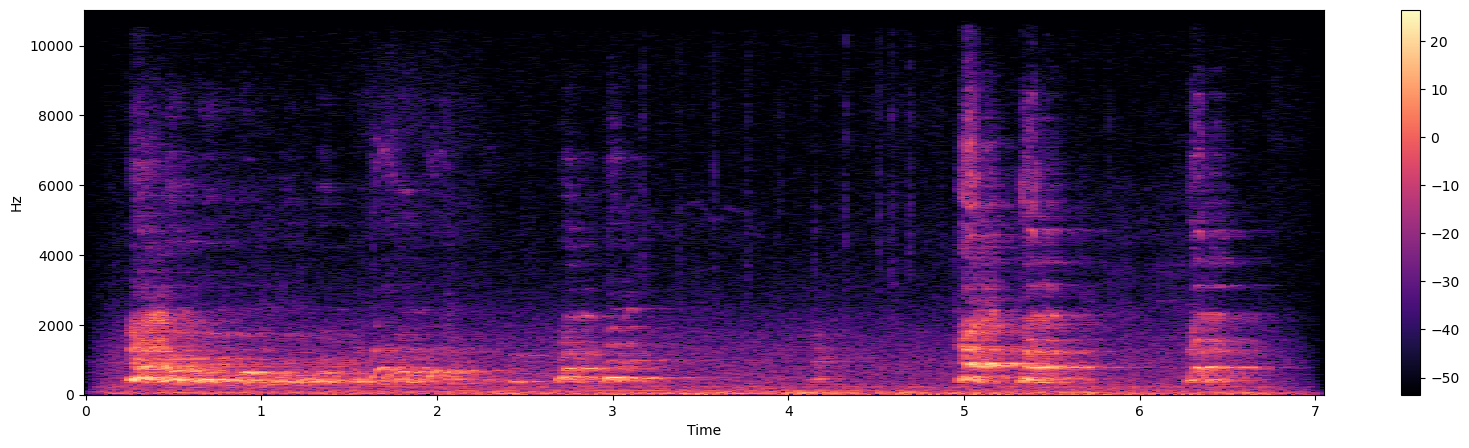

In [10]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

**Log Frequency axis**

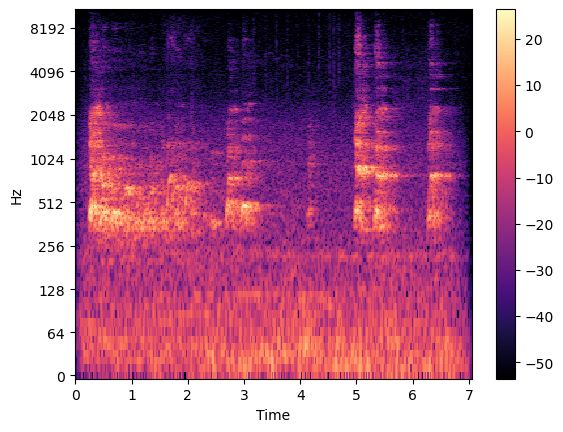

In [12]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

**Creating an audio signal**

Let us now create an audio signal at 220Hz. We know an audio signal is a numpy array, so we shall create one and pass it on to the audio function.

In [13]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

**Playing the sound**

In [14]:
ipd.Audio(x, rate=sr) # load a NumPy array

**Saving the signal**

In [25]:
from scipy.io import wavfile
wavfile.write('mexmex.wav', sr, x) 

# Feature Extraction

In [31]:
x, sr = librosa.load('mitoy.wav')
ipd.Audio(x, rate=sr)

**Plot the signal:**

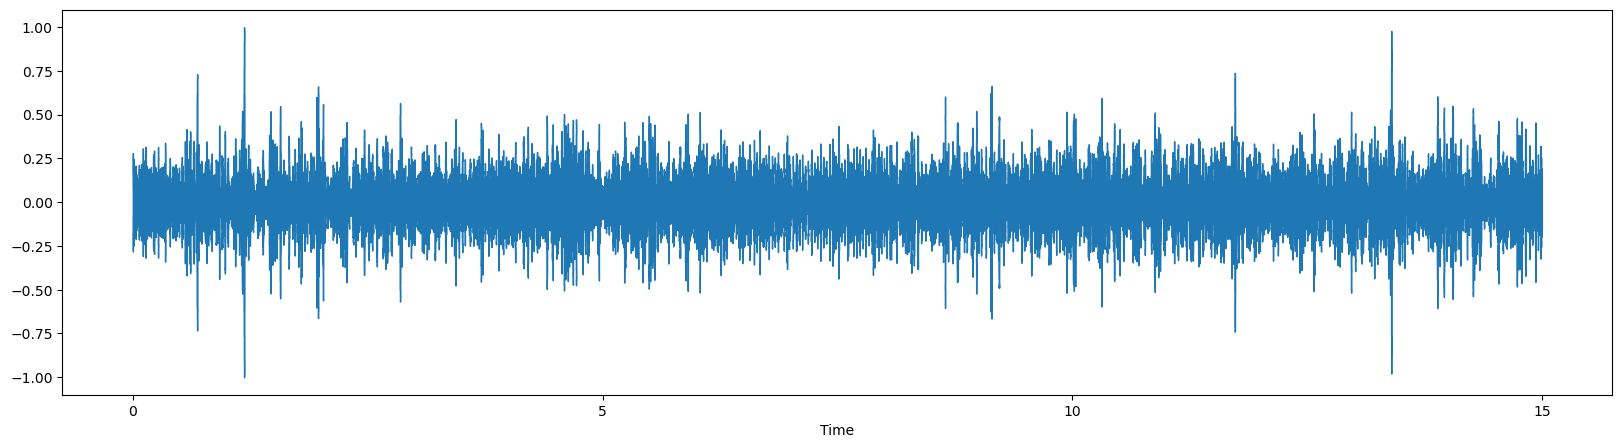

In [32]:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)

**1. Zero Crossing Rate**

**Zooming in**

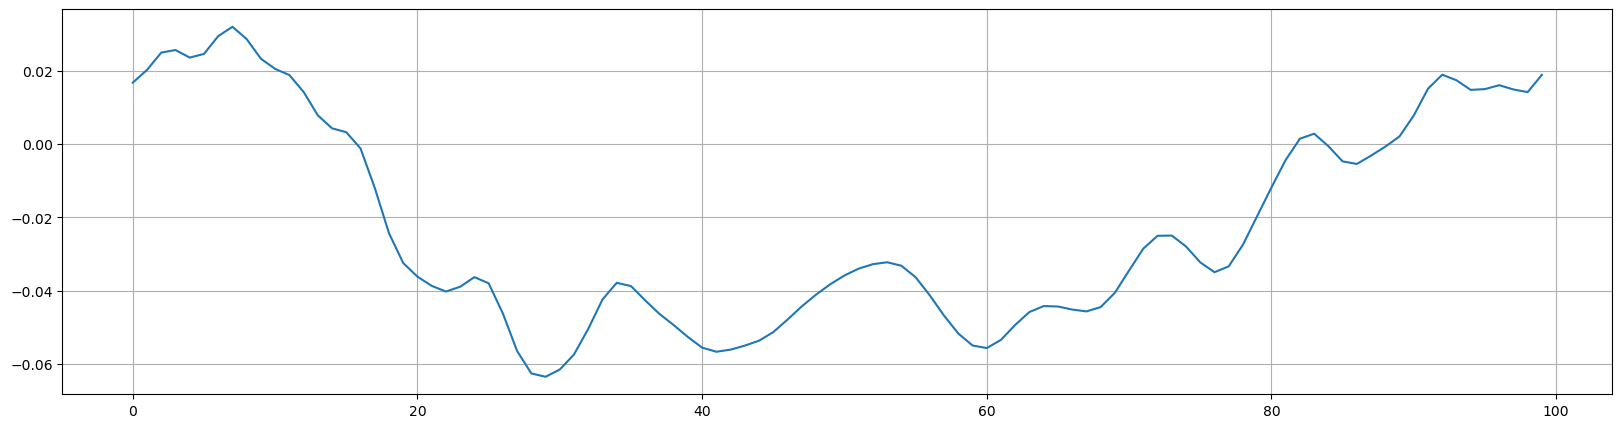

In [34]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

I count 6 zero crossings. Let's compute the zero crossings using librosa.

In [35]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [36]:
print(sum(zero_crossings))

4


**2.Spectral Centroid**

In [57]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

(646,)

**3.Spectral Rolloff**

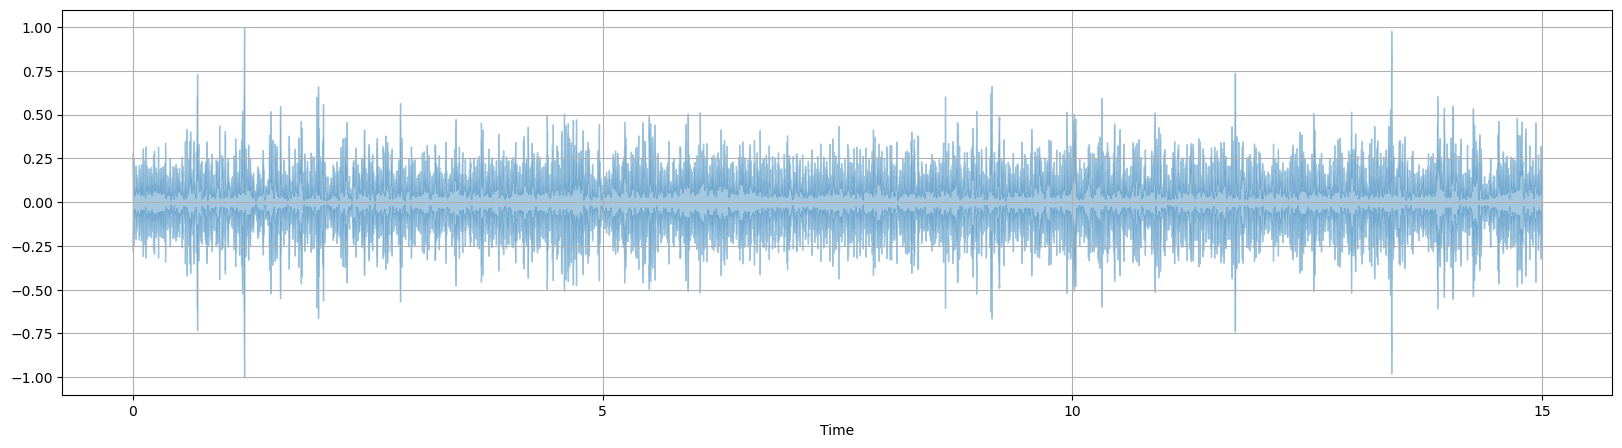

In [80]:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

**4.MFCC**

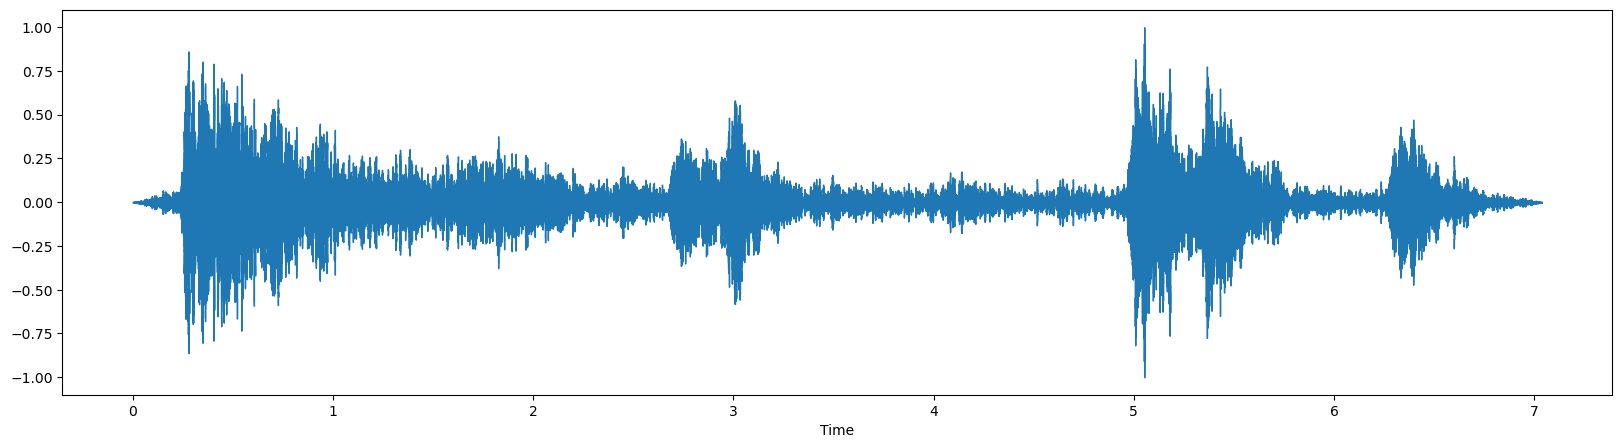

In [82]:
plt.figure(figsize=(20,5))
x, fs = librosa.load('carl.wav')
librosa.display.waveshow(x, sr=sr)

(20, 304)


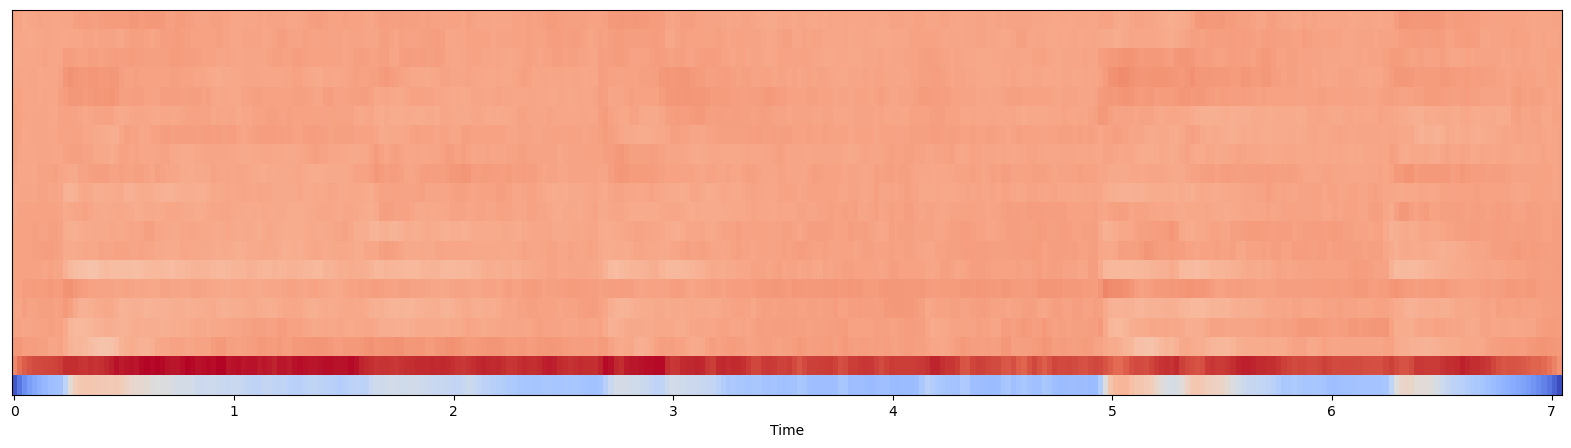

In [84]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

**Feature Scaling**

Let's scale the MFCCs such that each coefficient dimension has zero mean and unit variance:

In [86]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 1.2548346e-08  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -2.5096693e-08  0.0000000e+00  1.2548346e-08  0.0000000e+00
  1.2548346e-08 -1.2548346e-08  1.2548346e-08  3.1370866e-09
 -6.2741732e-09  0.0000000e+00 -1.2548346e-08  0.0000000e+00]
[1.        1.        1.        1.        1.0000001 1.        0.9999999
 1.        1.        0.9999999 1.        0.9999999 1.        1.
 1.        1.0000001 1.0000001 1.0000001 0.9999999 1.       ]


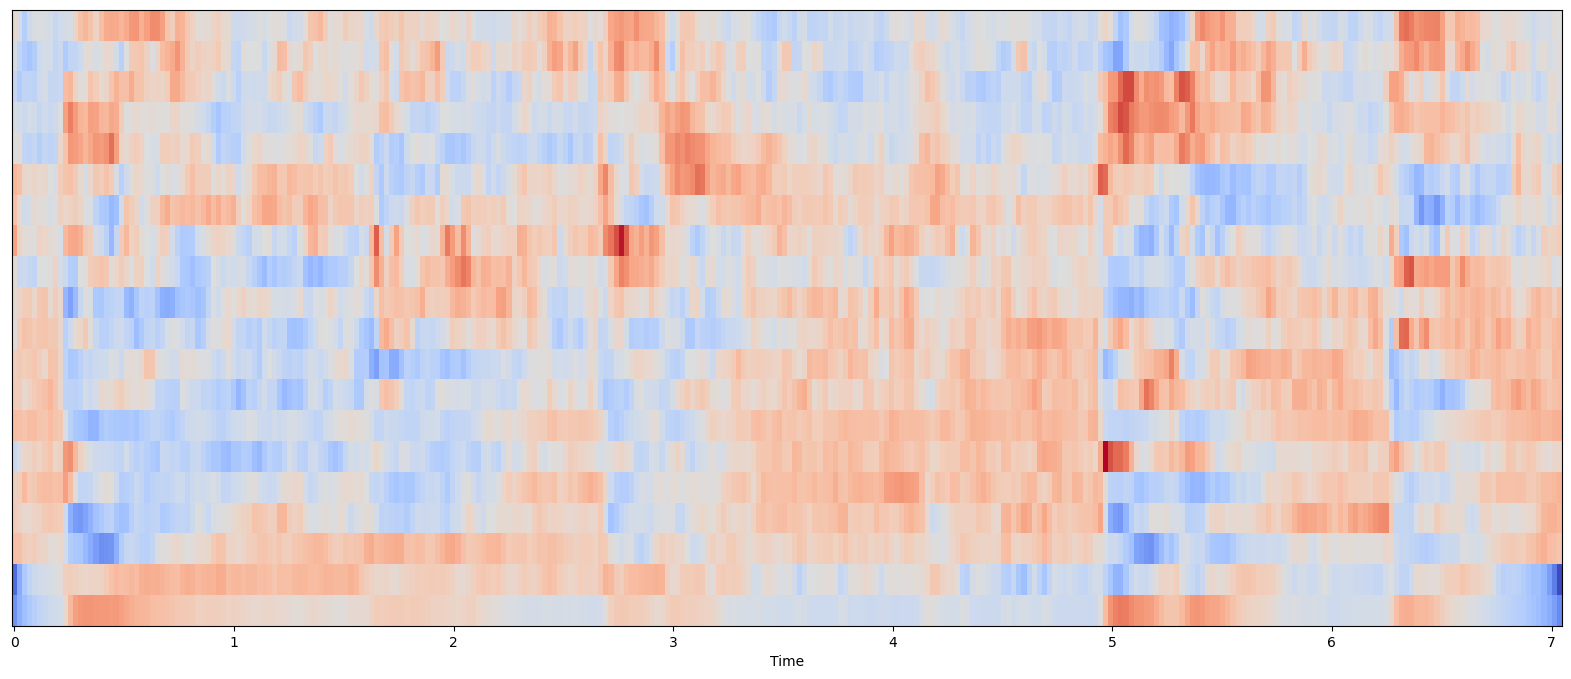

In [87]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

**Chroma Frequencies**

In [88]:
# Loadign the file
x, sr = librosa.load('carl.wav')
ipd.Audio(x, rate=sr)

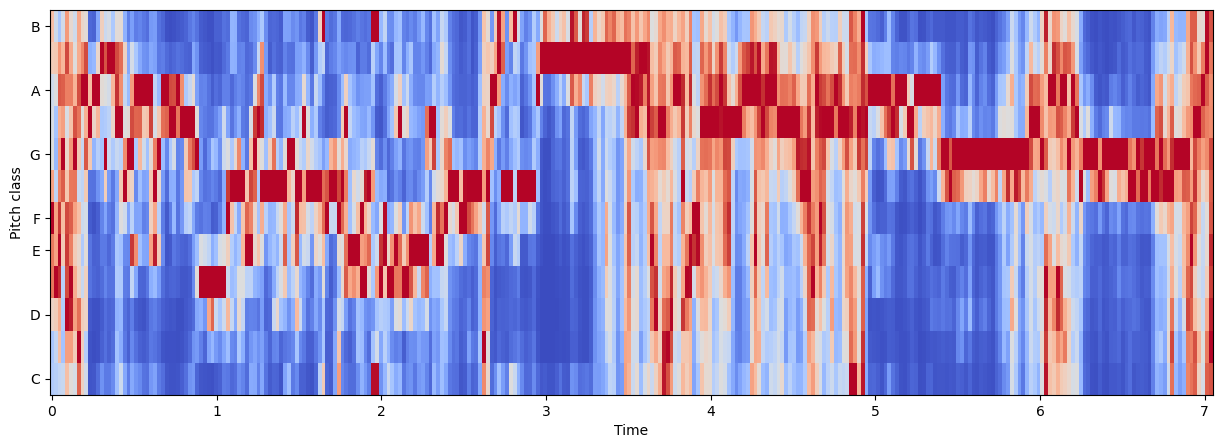

In [90]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')